# Forecast | Time Series Suavización Exponencial | Holt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", ConvergenceWarning)

## Data

In [3]:
df = pd.read_csv ('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],
                  index_col= 'date')
df.head() 

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


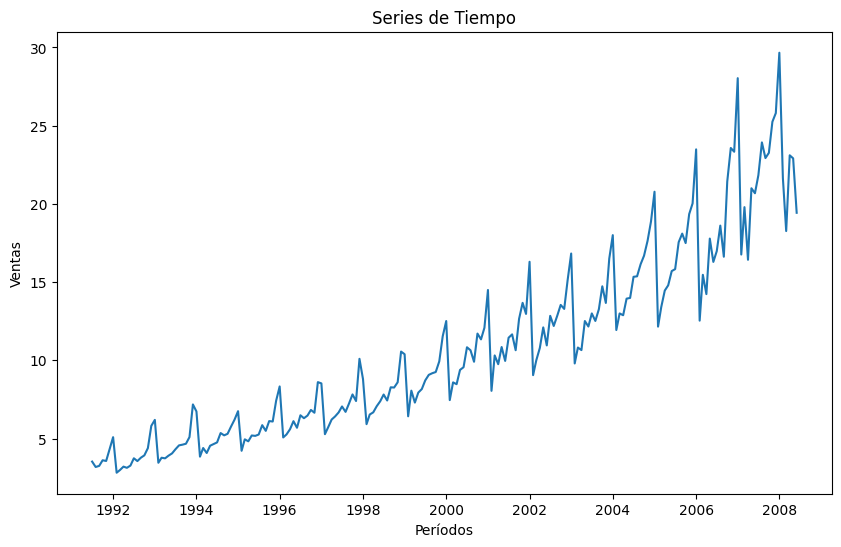

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['value'])

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.show()

## Manipulando los Datos

In [5]:
data = df['value'].resample("A").sum()

data.index = pd.to_datetime(data.index , format='%Y/%m/%M')
data.index = data.index.strftime('%Y')
data = pd.DataFrame(data , columns=['value'])
data

,value
date,
1991,21.442946
1992,45.686946
1993,55.532688
1994,60.816080
1995,67.326599
1996,77.397927
1997,85.131672
1998,93.310626
1999,105.959043


## Suavazación Exponencial

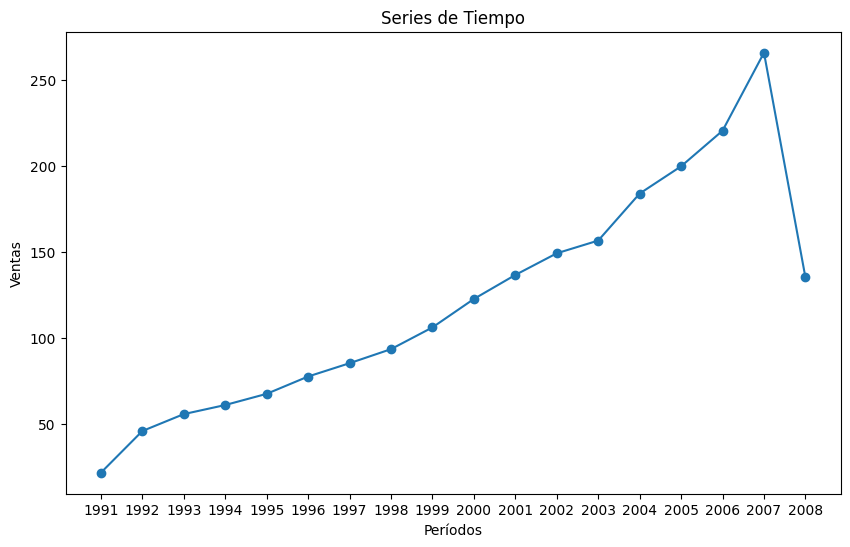

In [6]:
plt.figure(figsize=(10,6))
plt.plot(data, marker='o')

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.show()

## Suavización Exponencial | StatsModels

In [7]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [8]:
mod = SimpleExpSmoothing(data['value']).fit(smoothing_level=0.5, optimized=False)
data['ES'] = mod.fittedvalues
data

,value,ES
date,,
1991,21.442946,21.442946
1992,45.686946,21.442946
1993,55.532688,33.564946
1994,60.816080,44.548817
1995,67.326599,52.682448
1996,77.397927,60.004524
1997,85.131672,68.701225
1998,93.310626,76.916448
1999,105.959043,85.113537


In [9]:
pred = mod.forecast(3)
pred

2009-01-01    184.282778
2010-01-01    184.282778
2011-01-01    184.282778
Freq: AS-JAN, dtype: float64

In [10]:
pred.index = pd.to_datetime(pred.index, format='%Y/%m/%D')
pred.index = pred.index.strftime('%Y')

pred_ES = pd.concat([data['ES'], pred])
pred_ES

1991     21.442946
1992     21.442946
1993     33.564946
1994     44.548817
1995     52.682448
1996     60.004524
1997     68.701225
1998     76.916448
1999     85.113537
2000     95.536290
2001    109.016438
2002    122.741940
2003    135.904038
2004    146.184150
2005    164.991542
2006    182.323569
2007    201.339122
2008    233.529044
2009    184.282778
2010    184.282778
2011    184.282778
dtype: float64

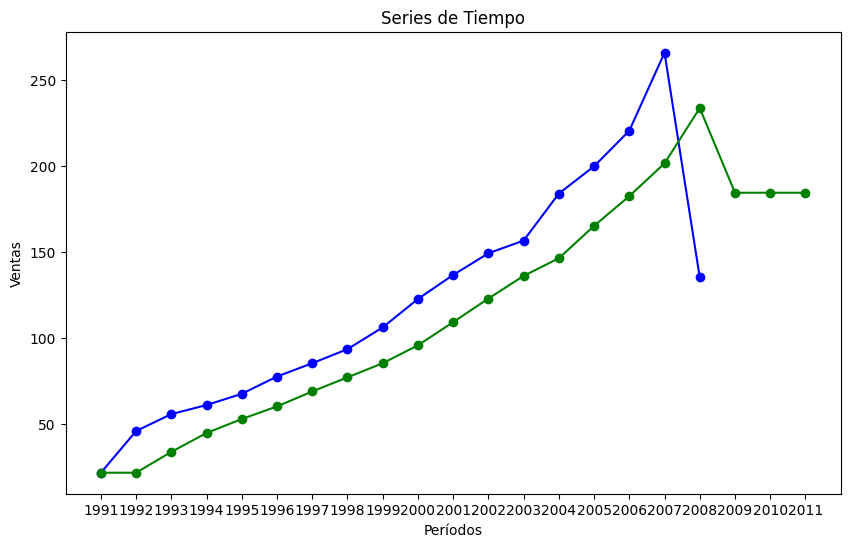

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data['value'], marker='o', color='blue', label='data')
plt.plot(pred_ES, marker='o', color='green', label='ES')

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.show()

## Suavización Exponencial | Método de Holt | StatsModels

In [12]:
from statsmodels.tsa.api import Holt

In [13]:
mod = Holt(data['value']).fit(smoothing_level=0.5, smoothing_slope=0.2, optimized=False)
data['Holt'] = mod.fittedvalues
data 

,value,ES,Holt
date,,,
1991,21.442946,21.442946,45.686946
1992,45.686946,21.442946,55.384546
1993,55.532688,33.564946,71.385586
1994,60.816080,44.548817,82.723687
1995,67.326599,52.682448,88.843673
1996,77.397927,60.004524,93.007218
1997,85.131672,68.701225,98.563725
1998,93.310626,76.916448,103.865646
1999,105.959043,85.113537,109.550581


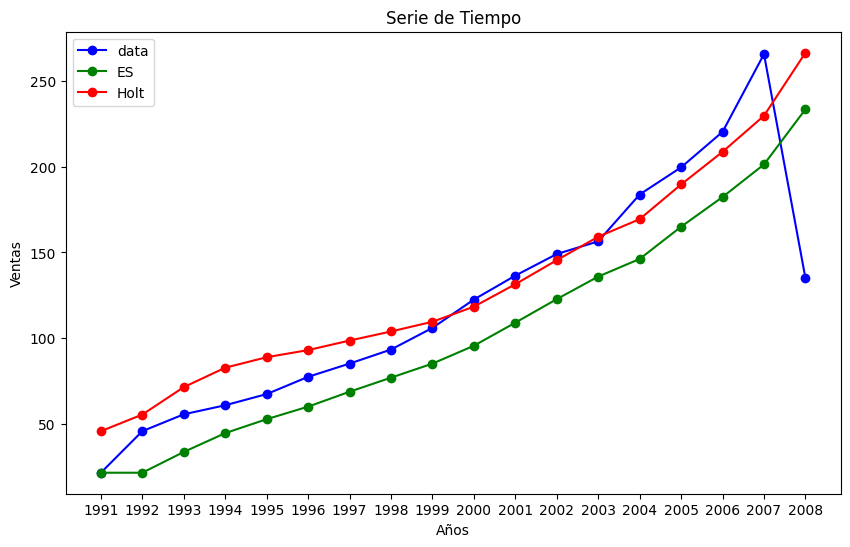

In [14]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['value'], marker='o', color='blue', label='data')
plt.plot(data.index, data['ES'], marker='o', color='green', label='ES')
plt.plot(data.index, data['Holt'], marker='o', color='red', label='Holt')

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Serie de Tiempo')
plt.legend(loc='best')
plt.show()

In [15]:
pred = mod.forecast(3)
pred

2009-01-01    206.449449
2010-01-01    212.109815
2011-01-01    217.770180
Freq: AS-JAN, dtype: float64

In [16]:
pred.index = pd.to_datetime(pred.index, format='%Y/%m/%D')
pred.index = pred.index.strftime('%Y')

pred_Holt = pd.concat([data['Holt'], pred])
pred_Holt

1991     45.686946
1992     55.384546
1993     71.385586
1994     82.723687
1995     88.843673
1996     93.007218
1997     98.563725
1998    103.865646
1999    109.550581
2000    118.358104
2001    131.444484
2002    145.475399
2003    159.149276
2004    169.416777
2005    189.656080
2006    208.704013
2007    229.742586
2008    266.541655
2009    206.449449
2010    212.109815
2011    217.770180
dtype: float64

In [17]:
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.500000,False
smoothing_trend,beta,0.200000,False
initial_level,l.0,21.442946,False
initial_trend,b.0,24.244000,False


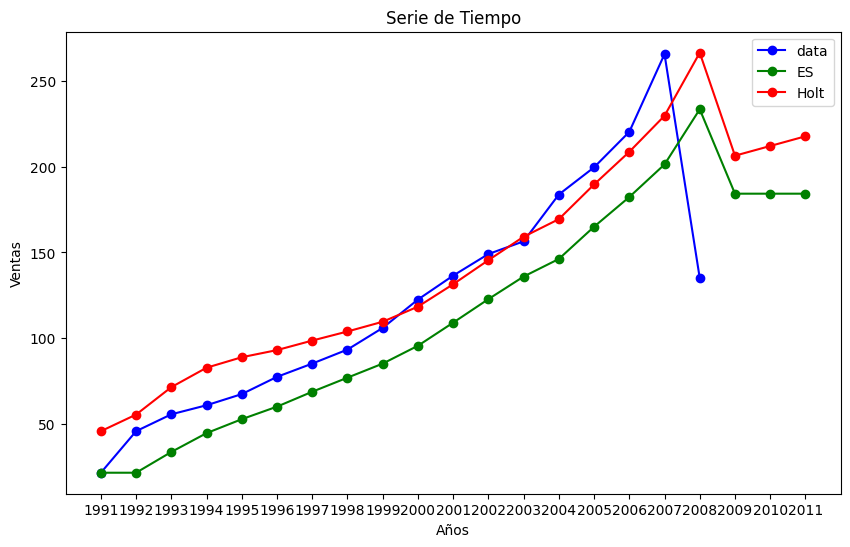

In [18]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['value'], marker='o', color='blue', label='data')
plt.plot(pred_ES, marker='o', color='green', label='ES')
plt.plot(pred_Holt, marker='o', color='red', label='Holt')

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Serie de Tiempo')
plt.legend(loc='best')
plt.show()

## Error | Sklearn

In [19]:
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [20]:
y_true = data['value']

y_ES = data['ES']
y_holt = data['Holt']

In [21]:
print(f"MSE Suavización exponencial {MSE(y_true, y_ES)}")
print(f"MSE Suavización exponencial Holt {MSE(y_true, y_holt)}")

MSE Suavización exponencial 1296.0944613973597
MSE Suavización exponencial Holt 1195.4095384735729


tiene mejor error de pronostico el segundo

## Suavización Exponencial | StatsModels | Aplicando los conceptos

In [22]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [23]:
# Forecast
# ES
mod_es = SimpleExpSmoothing(df['value']).fit(optimized=True)
df["ES"] = mod_es.fittedvalues
pred_es = mod_es.forecast(30)
expo_s = pd.concat([df["ES"], pred_es])

# Holt
mod_holt = Holt(df['value']).fit(optimized=True)
df["Holt"] = mod_holt.fittedvalues
pred_holt = mod_holt.forecast(30)
expo_holt = pd.concat([df['Holt'], pred_holt])

In [24]:
mod_holt.params_formatted

,name,param,optimized
smoothing_level,alpha,1.362817e-01,True
smoothing_trend,beta,8.619615e-13,True
initial_level,l.0,2.934866e+00,True
initial_trend,b.0,9.717239e-02,True


In [25]:
mod_es.params_formatted

,name,param,optimized
smoothing_level,alpha,0.359100,True
initial_level,l.0,3.466548,True


In [26]:
df

,value,ES,Holt
date,,,
1991-07-01,3.526591,3.466548,3.032038
1991-08-01,3.180891,3.488109,3.196609
1991-09-01,3.252221,3.377787,3.291639
1991-10-01,3.611003,3.332696,3.383440
1991-11-01,3.565869,3.432636,3.511625
...,...,...,...
2008-02-01,21.654285,26.272262,24.016047
2008-03-01,18.264945,24.613947,23.791354
2008-04-01,23.107677,22.334020,23.135378


In [27]:
print(f"MSE ES: {MSE(df['value'], df['ES'])}")
print(f"MSE ES: {MAPE(df['value'], df['ES'])}")
print("------")
print(f"MSE Holt: {MSE(df['value'], df['Holt'])}")
print(f"MSE Holt: {MAPE(df['value'], df['Holt'])}")

MSE ES: 4.024955370218677
MSE ES: 0.13194162718805003
------
MSE Holt: 3.8650137482839977
MSE Holt: 0.13650105882024458


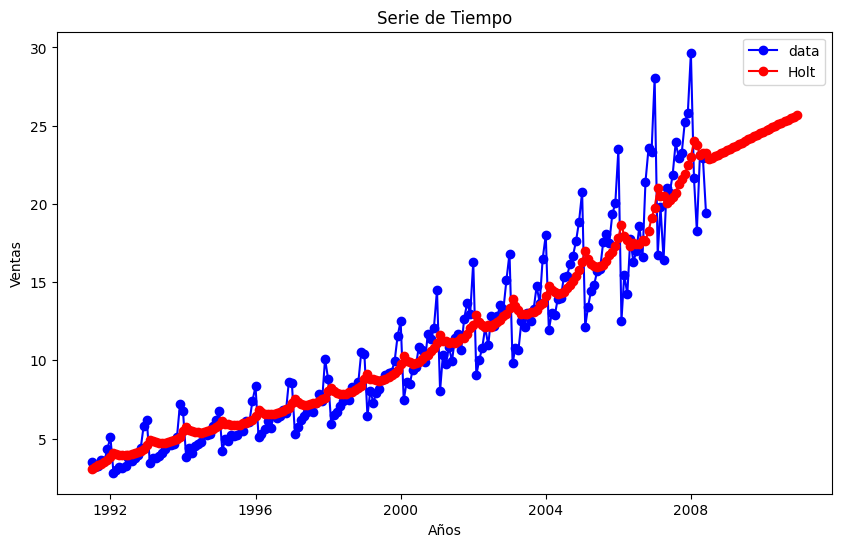

In [28]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['value'], marker='o', color='blue', label='data')
plt.plot(expo_holt, marker='o', color='red', label='Holt')

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Serie de Tiempo')
plt.legend(loc='best')
plt.show()

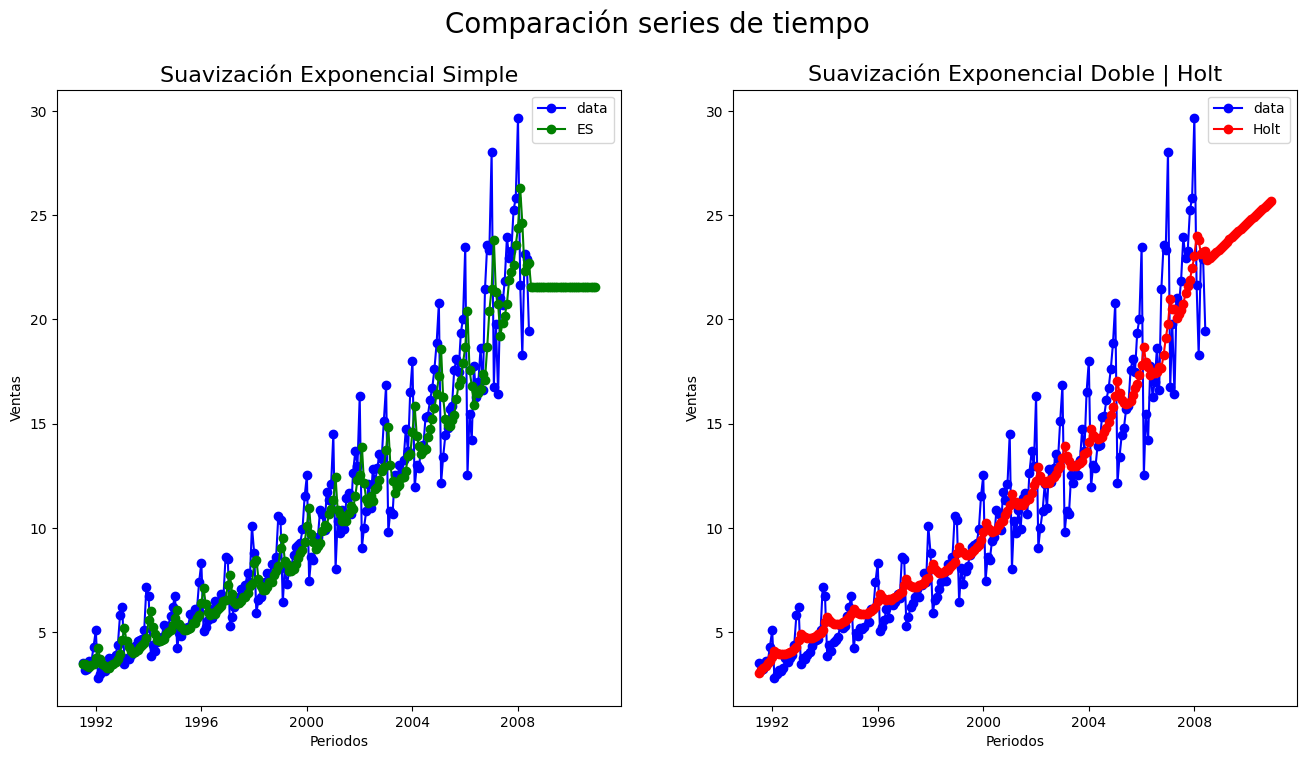

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Comparación series de tiempo', fontsize=20)

ax1.plot(df.index, df['value'], marker='o', color='blue', label='data')
ax1.plot(expo_s, marker='o', color='green', label='ES')
ax1.set_title('Suavización Exponencial Simple', fontsize=16)
ax1.set(xlabel='Periodos', ylabel='Ventas')
ax1.legend(loc='best')

ax2.plot(df.index, df['value'], marker='o', color='blue', label='data')
ax2.plot(expo_holt, marker='o', color='red', label='Holt')
ax2.set_title('Suavización Exponencial Doble | Holt', fontsize=16)
ax2.set(xlabel='Periodos', ylabel='Ventas')
ax2.legend(loc='best')

plt.show()